In [2]:
# グラフなどはNotebook内に描画
%matplotlib inline

import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt


# DataFrameの列の最大文字列長をデフォルトの50から150に変更
pd.set_option("display.max_colwidth", 150)


In [3]:
from datetime import datetime
import pytz

def parse_str(x):
    """
    Returns the string delimited by two characters.

    Example:
        `>>> parse_str('[my string]')`
        `'my string'`
    """
    return x[1:-1]

def parse_datetime(x):
    '''
    Parses datetime with timezone formatted as:
        `[day/month/year:hour:minute:second zone]`

    Example:
        `>>> parse_datetime('13/Nov/2015:11:45:42 +0000')`
        `datetime.datetime(2015, 11, 3, 11, 45, 4, tzinfo=<UTC>)`

    Due to problems parsing the timezone (`%z`) with `datetime.strptime`, the
    timezone will be obtained using the `pytz` library.
    '''
    dt = datetime.strptime(x[1:-7], '%d/%b/%Y:%H:%M:%S')
    dt_tz = int(x[-6:-3])*60+int(x[-3:-1])
    return dt.replace(tzinfo=pytz.FixedOffset(dt_tz))

(16572.333333333332, 16572.666666666668)

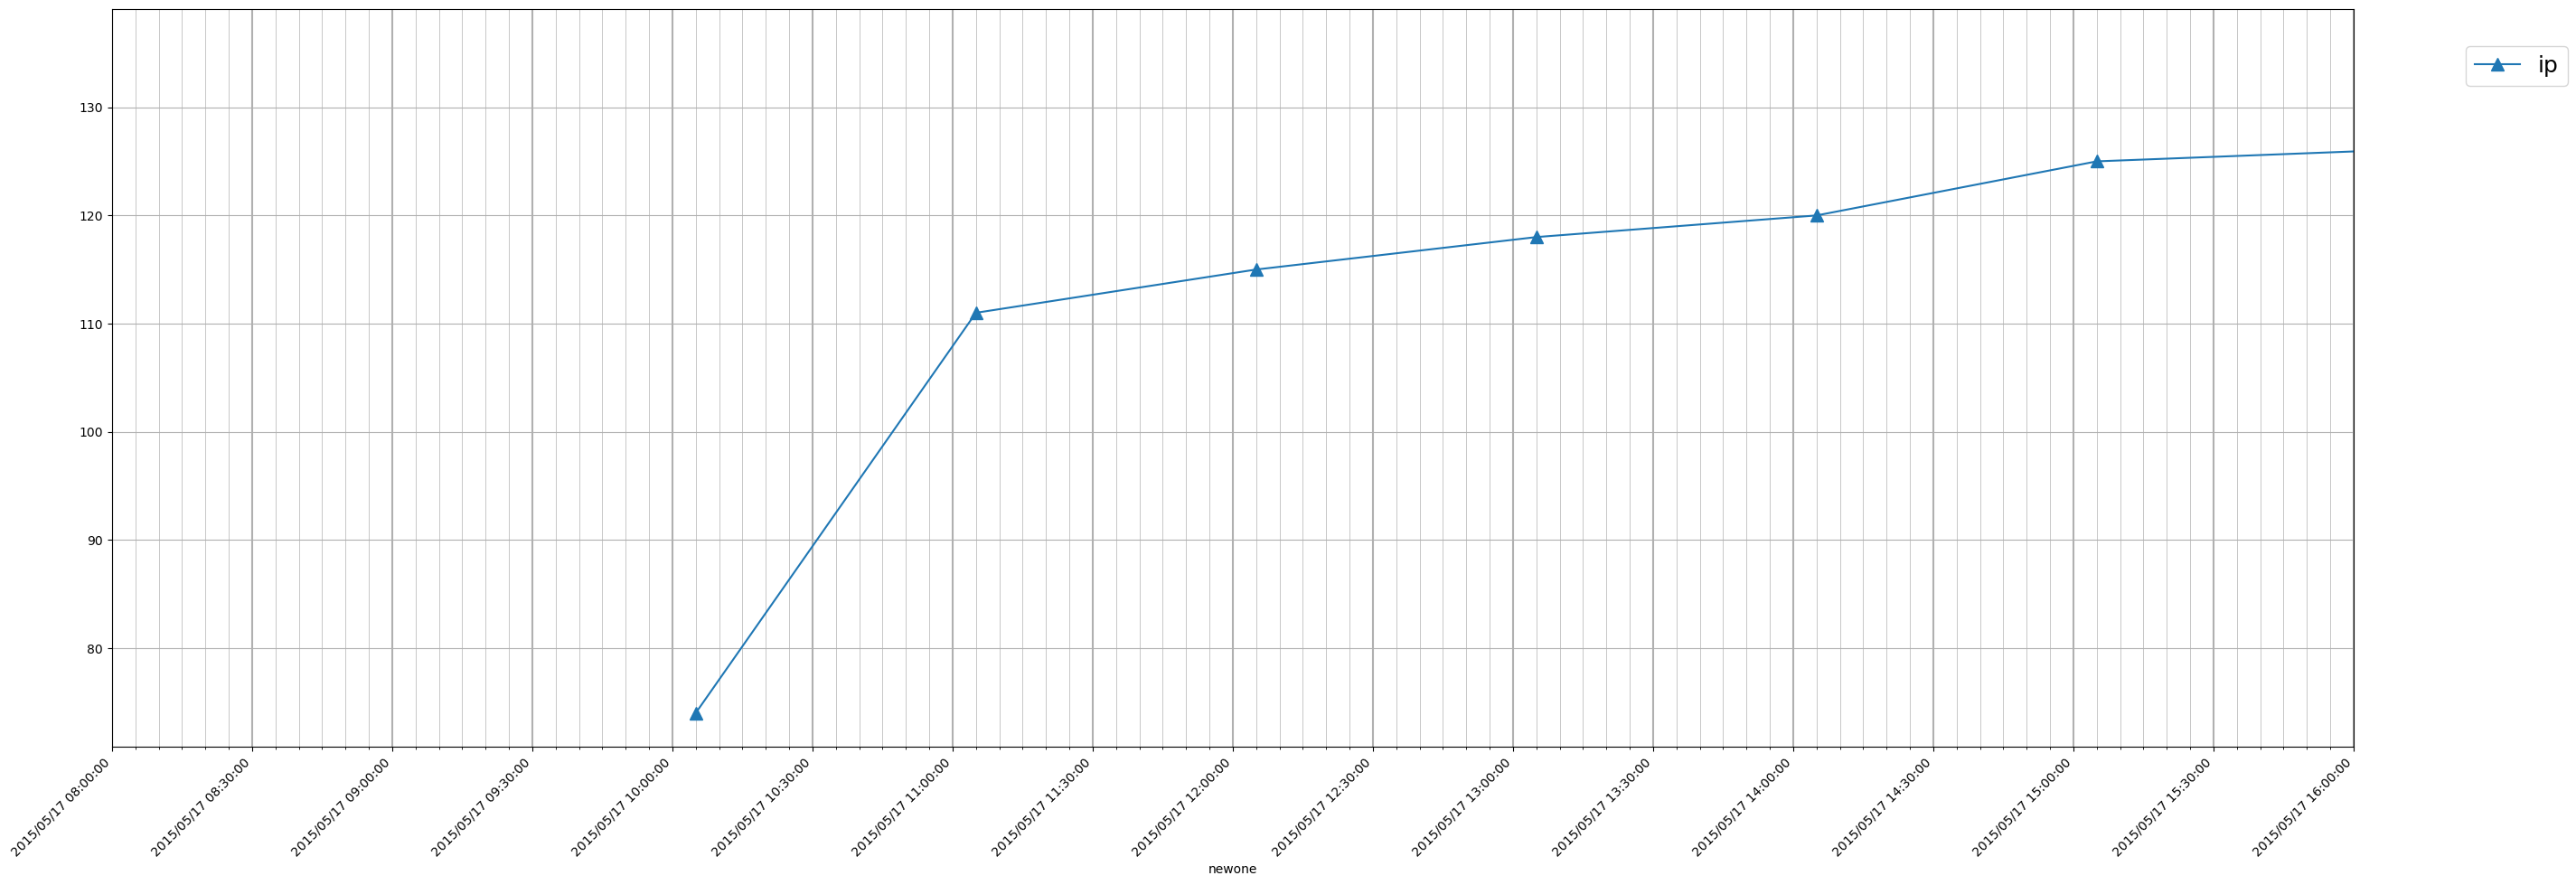

In [54]:
import re

data = pd.read_csv(
    'access_log',
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
    engine='python',
    na_values='-',
    header=None,
    usecols=[0, 3, 4, 5, 6, 7, 8],
    names=['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
    converters={'time': parse_datetime,
                'referer': parse_str,
                'request': parse_str,
                'status': int,
                'size': int,
                'user_agent': parse_str})


data['newone'] = data['time'].dt.floor('5min')


import matplotlib.pyplot as plt
import matplotlib.dates as mdatas
plot_data = data[['ip','newone']].groupby('newone').count()
ax = plot_data.plot(figsize=(32,12),marker='^',markersize=10)
ax.legend(bbox_to_anchor=(1.05, 0.95), loc='upper left', borderaxespad=0,
          fontsize=18,labelspacing=1.1)
ax.figure.autofmt_xdate(rotation=45, ha="right")
ax.yaxis.grid(True)
ax.xaxis.grid(True, which='major', linewidth=1.5)
ax.xaxis.grid(True, which='minor', linewidth=.5)
ax.xaxis.set_major_locator(mdatas.MinuteLocator(interval=30))
ax.xaxis.set_minor_locator(mdatas.MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(mdatas.DateFormatter('%Y/%m/%d %H:%M:%S'))
span = pd.to_datetime(["2015-05-17 08:00:00", "2015-05-17 16:00:00"])
ax.set_xlim(span)